# Regression

### Importing all the required libraries

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the csv file

In [105]:
df = pd.read_csv("../data/house_details_v1.csv")
df = df[df["Price"] != 0]
df.shape

(10051, 28)

### printing first five rows

In [106]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns', 28)
display(df.head())

,id,Street,Housenumber,Box,Floor,City,Postalcode,Property type,Region,District,Subtype,Price,Type of sale,Construction year,Bedroom Count,Habitable surface,Kitchen type,Furnished,Fireplace,Terrace,Garden,Garden surface,Facades,SwimmingPool,Condition,EPC score,Latitude,Longitude
0,10681697,Rue Colompré,108,0,0.0,Liege,4020,RESIDENTIAL,WALLONIE,Liège,HOUSE,149000.0,residential_sale,1899.0,4.0,137.0,INSTALLED,True,False,True,0,110.0,2.0,False,GOOD,F,50.640237,5.599121
1,10676490,drève du parc,45,0,1.0,Bruxelles,1000,URBAN,BRUSSELS,Brussels,APARTMENT,330000.0,residential_sale,2025.0,2.0,91.0,USA_INSTALLED,0,False,True,0,0.0,4.0,False,AS_NEW,A,50.866596,4.344900
2,10675312,Boulevard du Triomphe,201,B42,4.0,Auderghem,1160,URBAN,BRUSSELS,Brussels,FLAT_STUDIO,255500.0,residential_sale,2022.0,0.0,46.0,USA_HYPER_EQUIPPED,False,False,True,0,0.0,0.0,False,AS_NEW,A,50.816396,4.398940
3,10681830,Rue du Vieux Chemin,37,11,1.0,Embourg,4053,0,WALLONIE,Liège,APARTMENT,399000.0,residential_sale,2010.0,3.0,145.0,INSTALLED,0,True,True,0,0.0,3.0,0,GOOD,B,50.598571,5.618877
4,10681832,Rue du Vieux Chemin,37,11,1.0,Embourg,4053,0,WALLONIE,Liège,PENTHOUSE,399000.0,residential_sale,2010.0,3.0,145.0,INSTALLED,0,True,True,0,0.0,3.0,0,GOOD,B,50.598571,5.618877


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10051 entries, 0 to 10795
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10051 non-null  int64  
 1   Street             10051 non-null  object 
 2   Housenumber        10051 non-null  object 
 3   Box                10051 non-null  object 
 4   Floor              10051 non-null  float64
 5   City               10051 non-null  object 
 6   Postalcode         10051 non-null  object 
 7   Property type      10051 non-null  object 
 8   Region             10051 non-null  object 
 9   District           10051 non-null  object 
 10  Subtype            10051 non-null  object 
 11  Price              10051 non-null  float64
 12  Type of sale       10051 non-null  object 
 13  Construction year  10051 non-null  float64
 14  Bedroom Count      10051 non-null  float64
 15  Habitable surface  10051 non-null  float64
 16  Kitchen type       10051 no

In [107]:
# dropping duplicates
df = df.drop_duplicates(subset=[
 'Street',
 'Housenumber',
 'Box',
 'Floor',
 'City',
 'Postalcode',
 'Property type',
 'Region',
 'District',
 'Latitude',
 'Longitude'])
df.shape

(8357, 28)

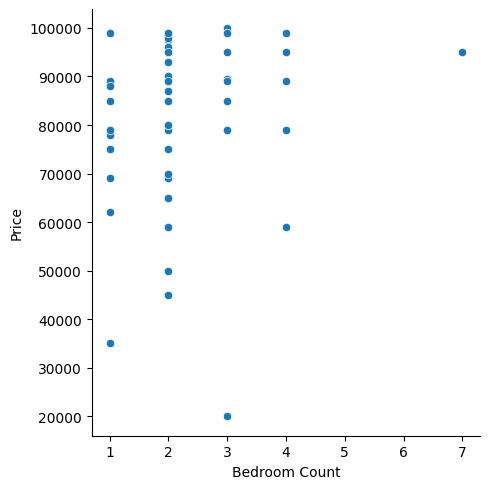

In [91]:
# plotting price vs number of bedroom
bedcount_df = df[["Bedroom Count","Price"]]
filtered_df = bedcount_df[(df["Bedroom Count"]<40) & (df["Price"]<100000) & (df["Subtype"]=="HOUSE")]
sns.relplot(x="Bedroom Count", y="Price", data=filtered_df, kind="scatter")
plt.show()

In [92]:
filtered_df.head()

,Bedroom Count,Price
425,1.0,62000.0
438,3.0,99000.0
534,3.0,79000.0
801,2.0,87000.0
1104,1.0,89000.0


In [93]:
filtered_df.corr()

,Bedroom Count,Price
Bedroom Count,1.000000,0.139585
Price,0.139585,1.000000


In [94]:
# creating matrices for dependent and independent variable
X = filtered_df.drop(columns=["Price"]).to_numpy()
y = filtered_df.Price.to_numpy().reshape(-1,1)

print("Shape of X:",X.shape)
print("Shape of y:",y.shape)

Shape of X: (82, 1)
Shape of y: (82, 1)


### Splitting the dataset

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)



#### Training the model

In [96]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [97]:
regressor.score(X_train, y_train)

0.01192644090587247

#### Testing the model

In [98]:
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_pred = regressor.predict(X_test)

In [99]:
regressor.score(X_test, y_test)

0.05590525787484879

### Visualizing by plotting the data

(8357, 8)

<Axes: >

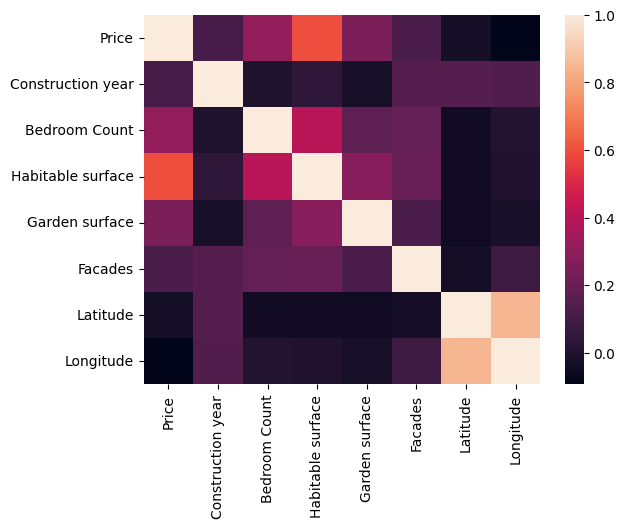

In [132]:
# dataframe for all the numeric values and checking the correlation
df_heatmap = df[[
 'Price',
 'Construction year',
 'Bedroom Count',
 'Habitable surface',
 'Garden surface',
 'Facades','Latitude','Longitude'
 ]]
display(df_heatmap.shape)
corr = df_heatmap.corr()
sns.heatmap(corr)

In [133]:
# Splitting and trining the numeric dataset 
X = df_heatmap.drop(columns=["Price"]).to_numpy()
y = df_heatmap.Price.to_numpy().reshape(-1,1)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, test_size=0.33)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

(5599, 7)
(2758, 7)
(5599, 1)
(2758, 1)


LinearRegression()

In [134]:
# checking the score for the training set
regressor.score(X_train, y_train)

0.4453368675486463

In [135]:
# Testing the model 
X_test = X_test.reshape(-1, 7)
y_test = y_test.reshape(-1, 1)
y_pred = regressor.predict(X_test)
regressor.score(X_test, y_test)
#print(X_test.shape)

0.3137796553228832

ValueError: x and y must be the same size

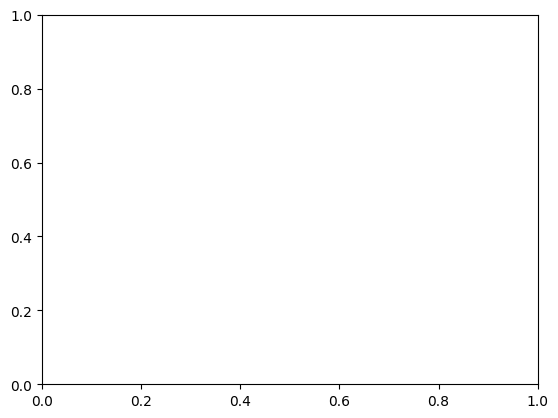

In [137]:
import matplotlib.pyplot as plt
plt.scatter(X_train, regressor.predict(X_train))
plt.scatter(X_train, y_train, color="red")
plt.show()